# Title: Analyzing Heavy Traffic Indicators on I-94

# Introduction
### The goal of this analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows. 
### By utilizing a number of exploratory data visualization techniques, we'll analyze the effects weather patterns have on traffic congestion.

In [214]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [215]:
#Read in traffic_control dataset 

traffic_control = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

## Examining the Dataset

In [216]:
traffic_control.head()
traffic_control.tail()
traffic_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### Side note: The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

In [217]:
traffic_control['date_time'] = pd.to_datetime(traffic_control['date_time'])

## Examining traffic_volume column 

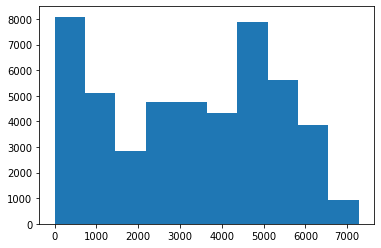

In [218]:
plt.hist(traffic_control['traffic_volume'])
plt.show()

## Looking at the traffic_volume distribution 
### Based on the distribution of the traffic_volume, we have gathered the following;
* it appears 25% of the time there were 1193 or fewer cars passing the station per hour. 
* Another 25% of the time there were 4933 or more cars passing the station per hour.  
* The traffic volume distribution results could be affected by the time of day.

In [219]:
traffic_control.traffic_volume.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Text(0.5, 0, 'Traffic volume [cars per hr]')

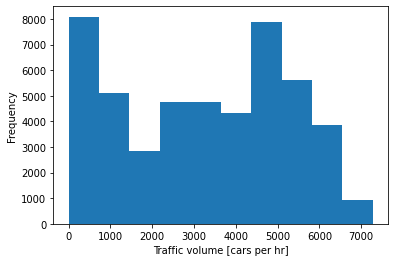

In [220]:
traffic_control.traffic_volume.plot.hist()
plt.xlabel('Traffic volume [cars per hr]')

In [221]:
traffic_control.traffic_volume.value_counts(bins=10).sort_index()

(-7.281000000000001, 728.0]    8095
(728.0, 1456.0]                5100
(1456.0, 2184.0]               2835
(2184.0, 2912.0]               4765
(2912.0, 3640.0]               4761
(3640.0, 4368.0]               4349
(4368.0, 5096.0]               7886
(5096.0, 5824.0]               5634
(5824.0, 6552.0]               3854
(6552.0, 7280.0]                925
Name: traffic_volume, dtype: int64

## Examining traffic volume: Day vs. Night

In [222]:
#isolating timeframes via day and day (7am to 7pm = day and 7pm to 7am = night)
day = traffic_control.copy()[(traffic_control['date_time'].dt.hour >=7 ) & (traffic_control['date_time'].dt.hour < 19)]
night = traffic_control.copy()[(traffic_control['date_time'].dt.hour >= 19) | (traffic_control['date_time'].dt.hour < 7)]
print(day.shape)
print(night.shape)
traffic_control['date_time'].value_counts(bins=12)

(23877, 9)
(24327, 9)


(2018-04-01 11:50:00, 2018-09-30 23:00:00]              5382
(2017-04-01 13:30:00, 2017-10-01 00:40:00]              5334
(2016-10-01 02:20:00, 2017-04-01 13:30:00]              5257
(2017-10-01 00:40:00, 2018-04-01 11:50:00]              5219
(2016-04-01 15:10:00, 2016-10-01 02:20:00]              4827
(2012-09-30 04:26:59.999999999, 2013-04-02 20:10:00]    4739
(2013-04-02 20:10:00, 2013-10-02 07:20:00]              4482
(2013-10-02 07:20:00, 2014-04-02 18:30:00]              4153
(2015-10-02 04:00:00, 2016-04-01 15:10:00]              3458
(2015-04-02 16:50:00, 2015-10-02 04:00:00]              2756
(2014-04-02 18:30:00, 2014-10-02 05:40:00]              2597
(2014-10-02 05:40:00, 2015-04-02 16:50:00]                 0
Name: date_time, dtype: int64

### Further examination of the the date_time column we can tell where the discrepancies lay within our <br>
### day and night isolated datasets. We have missing date and timestamp for 4pm and 5am.

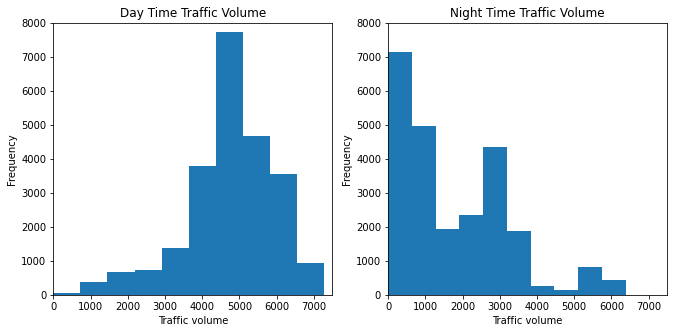

In [223]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Day Time Traffic Volume')
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.ylabel('Frequency')
plt.xlabel('Traffic volume')

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Night Time Traffic Volume')
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.ylabel('Frequency')
plt.xlabel('Traffic volume')
plt.show()

In [224]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [225]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

# Day vs. Night Analysis

### From the histogram distribution of the day time traffic volume, we can see the graph is skewed to the left. This means the majority of the traffic volume is leaning toward the higher number on our graph. <br> Looking at the Night traffic volume graph, were can see the opposite distribution occuring. The night graph is skewed to the right, showing the majority of traffic volume numbers in the lower range. <br>This means the majority of traffic volume is leaning toward the lower numbers at night.<br>
## We can further inspect this by looking at the statistics of the day and night time traffic volume separately.<br> Looking at the day traffic volume output, we can see that at majority of the cars are passing the station in the day time ( ~4300 or more ) whereas, there are only ~2800 cars passing the station at night time.<br><br> If we want to locate indicators of heavy traffic volume, then we want to look at the day time traffic data. 

# Examining Traffic volume by Time
### We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day


In [226]:
# Group mean traffic volume by month
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'] 

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

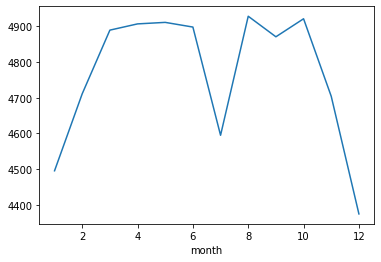

In [227]:
by_month['traffic_volume'].plot.line()
plt.show()

### Based off the above graph we can see a few interesting data points. It looks like there is heavier traffic from March-June and then again from August-October. based off this data, it appears traffic tends to heavier during the warmer months of the year besides, July.  Is there an exception to why the traffic drops dramatically in July, just to pick back up?  

## Day of the Week 

In [228]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'] 

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

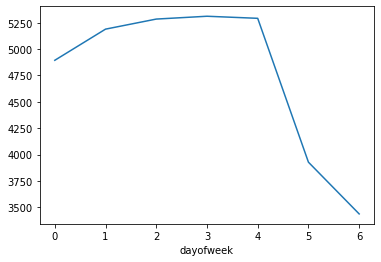

In [229]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

### From our graph, we can see traffic is heaviest from Monday-Friday and tapers down toward the end of the week. Simply suggesting, traffic is heaviest during working days and less during the weekend. 

### We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [230]:
day['hour'] = day['date_time'].dt.hour
# 4 equals Friday
business_days = day.copy()[day['dayofweek']  <= 4]
# 5 equals Saturday and 6 equals Sunday
weekend = day.copy()[day['dayofweek'] >= 5]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])



hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


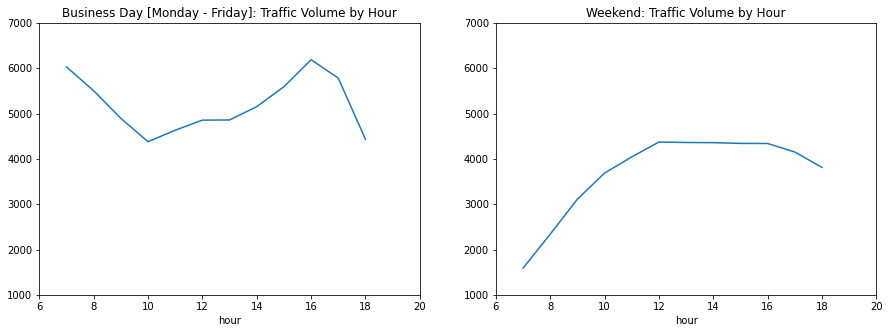

In [231]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1000, 7000)
plt.title("Business Day [Monday - Friday]: Traffic Volume by Hour")


plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1000, 7000)
plt.title('Weekend: Traffic Volume by Hour')
plt.show()

### To summarize, we found a few different indicators of heavy traffic.
* Traffic is heavier during the hotter months of the year (March - October).
* Traffic is is heavier during business days (Monday - Friday).
* Rush hour traffic is around 7 and 16, during the business days.

# Weather Indicators

### Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description<br>
### Examining the different weather indicators, it looks like `temperature` has the strongest correlation with traffic volume (value of +0.128).



In [232]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

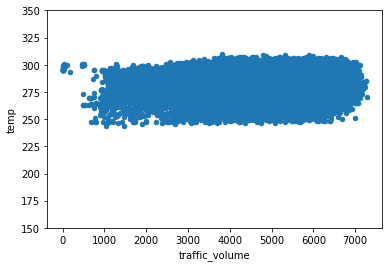

In [233]:
day.plot.scatter('traffic_volume','temp')
plt.ylim(150,350)
plt.show()

### Looking at the scatter plot of `temperature` it doesnt appear to have as strong of a correlation than previously thought.<br/>
### To see if we can find more useful data, we'll look next at the categorical weather-related columns: `weather_main` and `weather_description`.

## Weather Types

### To see if we can find any correlation between different types of weather conditions and traffic volume, were going to group each weather condition by traffic volume, using a horizontal bar graph.

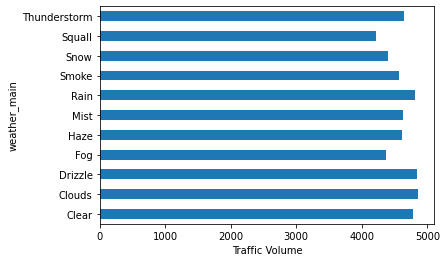

In [234]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel("Traffic Volume")
plt.show()

### None of the weather types exceeed traffic volume by 5000 cars but there are a few that have can be a classified as a `heavy traffic indicator.`
* Thunderstorm
* Rain
* Drizzle
* Clouds

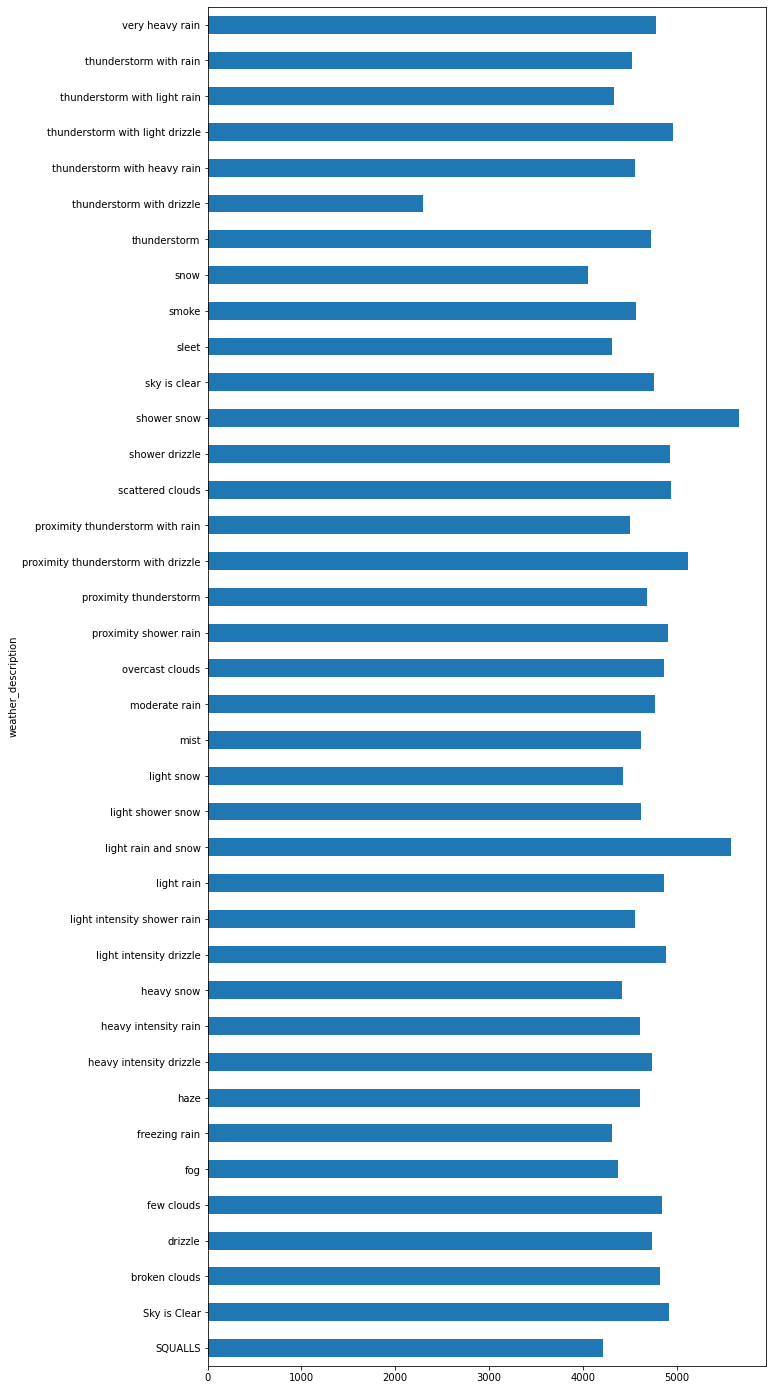

In [235]:
plt.figure(figsize=(10,25))
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh()
plt.show()

### We can further inspect any coorealtion weather may have on heavy traffic volume by getting the mean values by weather_description. <br>
### From the graph above, we can see there are a number of potential indicators (values > 5000) that we can isolate to determine which weather types cause the heaviest traffic.

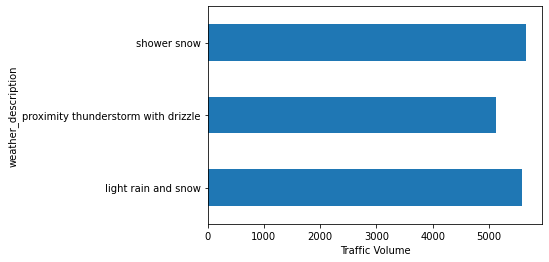

In [236]:
weather_descr_grt_5000 = by_weather_description[by_weather_description['traffic_volume'] > 5000]
weather_descr_grt_5000['traffic_volume'].plot.barh()
plt.xlabel('Traffic Volume')
plt.show()

### Now that we have isolated which weather types cause the heaviest traffic(exceeding 5000 cars) we can determine the following three types cause the most volume:<br>
* Shower snow
* Proximity thunderstorm with drizzle
* Light rain and snow 

# Conclusion

### In this project, we attempted to find some indicators of heavy traffic on the I-94 Interstate Highway. There were two notable indicators that we discovered:<br>
1. Time indicators
    * Traffic is heaviest during hotter months (march-October).
    * Traffic is heaviest during the work day (Monday-Friday) compared to the weekends.
    * Rush hour is usually around 7 and 16.
2. Weather indicators
    * Shower snow
    * Proximity thunderstorm with drizzle
    * Light rain and snow